Subject: SRM-RL4-AI-Name-A2 <br>
Reg Number: RA1911032020022 <br>
Name: Sheetal Nair A <br>
Year: Third year <br>
Dept and Class: CSE IoT-A

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [5]:
df.shape

(3276, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.0 KB


How much water potable?

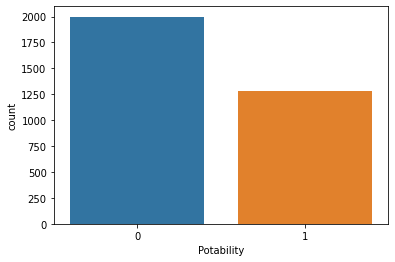

In [7]:
sns.countplot(data=df, x=df.Potability)
plt.show()

Handling NULL values

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

we cannot delete the 1434 (491+781+162)rows,because already we have less data(3276 records), so fill those null values with,
mean/mode/median, here we fill with mean values because we have outliers.

In [9]:
df.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [10]:
new=df.fillna(df.mean()) 

In [11]:
#(or) df=df.fillna(df.mean()) (or) df.fillna(df.mean(),inplace=True) because by default,inplace will be in False

In [12]:
new

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [13]:
new.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

TO check dimensionality reducction

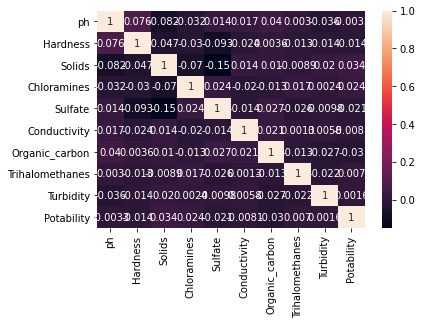

In [14]:
sns.heatmap(new.corr(),annot=True)
plt.show()

annot – an array of same shape as data which is used to annotate the heatmap. ... This maps the data values to the color space. fmt – string formatting code to use when adding annotations. linewidths – sets the width of the lines that will divide each cell.

Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.

As we can see above, we cannot ignore any coloumn, since there is less correlation,values are close to 0.

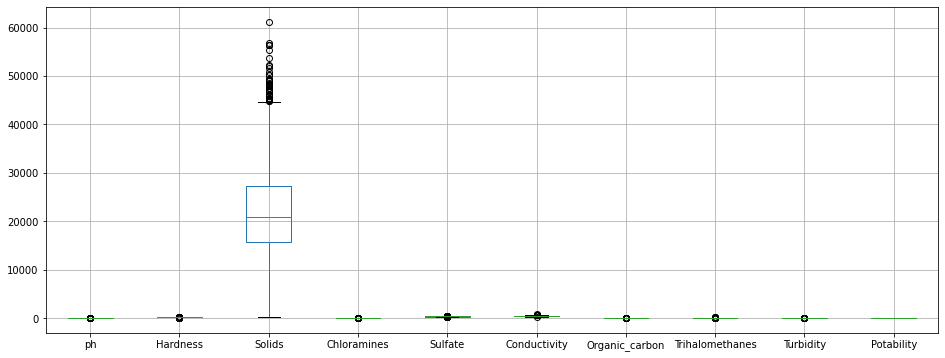

In [15]:
new.boxplot(figsize=(16,6))
plt.show()

Partition of data

In [16]:
X= new.drop('Potability',axis=1) #Input data

In [17]:
Y= new['Potability'] #Target data/variable

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=None)

Model Training

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [20]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [21]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3116,5.230003,176.714023,27971.891810,7.597981,413.914000,440.355374,14.423614,72.837370,3.045612
2494,6.039823,164.026340,9943.637599,7.723305,350.756261,374.794719,16.668446,65.542662,3.923766
2270,6.020654,197.469090,10529.310300,5.305352,416.495213,412.011733,9.909315,59.167002,5.217131
2326,6.933654,217.770316,19026.017330,3.117441,317.066842,448.234640,12.943634,76.824752,2.010729
2292,6.195255,170.002291,16666.130810,9.483424,333.775777,457.068162,16.345685,79.369243,3.138971
...,...,...,...,...,...,...,...,...,...
2454,4.291688,124.007350,18038.474370,8.603297,333.775777,548.574462,15.682821,91.860960,4.616089
2544,7.054267,212.429124,7450.074375,8.727110,333.775777,396.052782,11.383954,75.219338,4.780616
792,3.940125,163.171653,25911.321680,4.138540,371.967180,487.985185,17.751705,63.612403,3.478005
679,7.806909,216.473169,21299.318660,6.217597,333.775777,524.079706,13.895631,83.146999,5.127911


In [22]:
Y_test

3116    0
2494    0
2270    0
2326    1
2292    0
       ..
2454    1
2544    0
792     1
679     1
283     1
Name: Potability, Length: 656, dtype: int64

If at 1509, the model says 1 then model is good but if 0 then not good

In [23]:
dt.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

As above we can see, model is not good

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [25]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100
accuracy_dt

59.45121951219512

Applying Hyper Parameter Tuning

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [27]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
    
print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.605 using {'criterion': 'entropy', 'min_samples_split': 12, 'splitter': 'random'}
0.581 (0.028) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.576 (0.030) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.587 (0.026) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.583 (0.029) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.584 (0.027) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.590 (0.031) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.586 (0.027) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.589 (0.032) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.587 (0.026) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.599 (0.031) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.591 (0.028) with: {'criterion': 'gin